In [1]:
# Cálculo de isoyetas y polígonos de thiessen.

import numpy as np
import pandas as pd

from scipy import spatial

from matplotlib import pyplot as plt

import geopandas as gpd
import shapely as shp

In [2]:
# Dirección de los datos.
path = "../Material/Clases/Clase 14/"

In [3]:
# Convertimos la estación hidrométrica en csv a un shapefile.

# Nombre de la estacion.
#nombre_est = "Estacion_36080"

# Cargamos la lista de estaciones.
#Estaciones = pd.read_csv(path + nombre_est + ".csv")

# Creamos un punto con las coordenadas.
#Estaciones["geometry"] = None
#Estaciones["geometry"] = gpd.points_from_xy(
#    Estaciones["LONGITUD"], Estaciones["LATITUD"])

# Creamos un GeoDataFrame.
# Las coordenadas están en WGS84 EPSG:4326.
#Estaciones = gpd.GeoDataFrame(Estaciones, geometry = "geometry", crs = 4326)
# A coordenadas UTM 13N ESPSG:32613.
#CRS = 32613
#Estaciones = Estaciones.to_crs(CRS)

# Actualizamos x, y.
#Estaciones["x"] = Estaciones.centroid.x
#Estaciones["y"] = Estaciones.centroid.y

# Guardamos.
#Estaciones.to_file(path + nombre_est + ".shp")

# Datos.
#Estaciones

In [4]:
# Graficamos la la estación hidrométrica.
#Estaciones.explore()

In [12]:
# Directorio curva masa.
dir_cm = "Curva masa/"
# Contorno de las subcuencas.
subc_b_n   = dir_cm + "Subcuencas_boundary.shp"
# Estaciones pluviométricas.
est_clic_n = dir_cm + "Estaciones_CLICOM.csv"
# Estaciones pluviográficas.
est_emas_n = dir_cm + "Estaciones_EMAS.csv"
# Estación hidrométrica.
est_hidro_n    = dir_cm + "Estacion_36080.shp"
 
# A coordenadas UTM 13N ESPSG:32613.
CRS = 32613

# Subcuencas.
#gdf_subc = gpd.read_file(path + subc_b_n)
# A coordenadas UTM 13N ESPSG:32613.
gdf_RH36Dc = gpd.read_file(path + "RH36D/RH36Dc_subc.shp")
gdf_RH36Dd = gpd.read_file(path + "RH36D/RH36Dd_subc.shp")
gdf_RH36De = gpd.read_file(path + "RH36D/RH36De_subc.shp")
gdf_RH36Df = gpd.read_file(path + "RH36D/RH36Df_subc.shp")
gdf_RH36Dg = gpd.read_file(path + "RH36D/RH36Dg_subc.shp")
gdf_RH36Dh = gpd.read_file(path + "RH36D/RH36Dh_subc.shp")
gdf_subc = gpd.GeoDataFrame( pd.concat( [gdf_RH36Dc, gdf_RH36Dd,
    gdf_RH36De, gdf_RH36Df, gdf_RH36Dg, gdf_RH36Dh
    ] ) ).reset_index( drop = True )
gdf_subc = gdf_subc.to_crs(CRS)

# Estación hidrométrica.
gdf_hidro = gpd.read_file(path + est_hidro_n)
# A coordenadas UTM 13N ESPSG:32613.
gdf_hidro = gdf_hidro.to_crs(CRS)

# Estaciones pluviométricas.
df_clic = pd.read_csv(path + est_clic_n)
# Creamos un punto con las coordenadas.
df_clic["geometry"] = gpd.points_from_xy(
    df_clic["LONGITUD"], df_clic["LATITUD"] )
# Creamos un GeoDataFrame.
# Las coordenadas están en WGS84 EPSG:4326.
df_clic = gpd.GeoDataFrame(df_clic, geometry = "geometry", crs = 4326)
# A coordenadas UTM 13N ESPSG:32613.
df_clic = df_clic.to_crs(CRS)
# Escogemos las estaciones relevantes.
df_clic = df_clic[~df_clic["ESTACION"].isin( [ "VICENTE GUERRERO",
    "NARCISO MENDOZA", "CUAUHTEMOC", "SANTA CLARA", "NUEVO MERCURIO",
    "AGUA NUEVA", "SIERRA VIEJA", "COLONIA GREVER PURISIMA SIFUENTES",
    "TIERRA Y LIBERTAD", "CHICHIMEQUILLAS", "EL PEÑASCO", "VALPARAISO",
    "JEREZ DE GARCIA SALINAS (DGE)", "BOCA DEL TESORERO", "CUEVA GRANDE",
    "JIMENEZ DEL TEUL", "SUCHIL", "PRESA SANTIAGO", "FELIPE ANGELES"
    ] ) ].reset_index( drop = True )

# Estaciones pluviográficas.
df_emas = pd.read_csv(path + est_emas_n)
# Creamos un punto con las coordenadas.
df_emas["geometry"] = gpd.points_from_xy(
    df_emas["LONGITUD"], df_emas["LATITUD"] )
# Creamos un GeoDataFrame.
# Las coordenadas están en WGS84 EPSG:4326.
df_emas = gpd.GeoDataFrame(df_emas, geometry = "geometry", crs = 4326)
# A coordenadas UTM 13N ESPSG:32613.
df_emas = df_emas.to_crs(CRS)
# Actualizamos x, y.
df_emas["x"] = df_emas.centroid.x
df_emas["y"] = df_emas.centroid.y
# Escogemos las estaciones relevantes.
df_emas = df_emas[~df_emas["ESTACION"].isin( [ "SIERRAFRIA", "PRESA50ANIV",
    "ZACATECAS_EMA", "MATEHUALA", "AGUSTINMELGAR", "DURANGO",
    "LAMICHILIADGO", "COLOTLAN", "TORREON", "SALTILLO"
    ] ) ].reset_index( drop = True )

In [9]:
# Graficamos.
df_clic.explore()

In [10]:
# Graficamos.
df_emas.explore()

In [13]:
# Graficamos.
gdf_subc.explore()

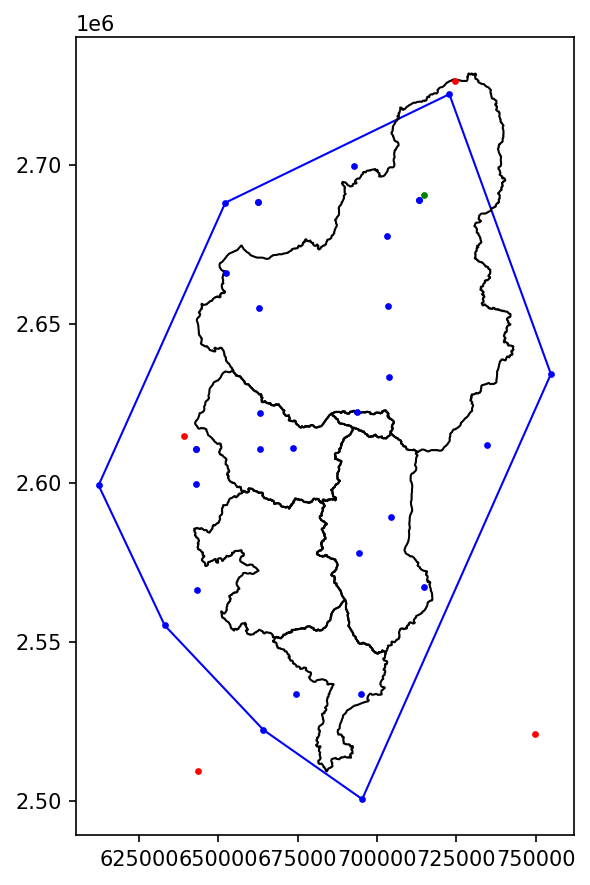

In [14]:
# Áreas de influencia

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos las subcuencas.
gdf_subc.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos la estación hidrométrica.
gdf_hidro.plot(ax = ax, color = "g", markersize = 5)
# Graficamos las estaciones pluviométricas.
df_clic.plot(ax = ax, color = "b", markersize = 5)
# Cobertura de las estaciones pluviométricas.
gpd.GeoSeries(df_clic.unary_union.convex_hull
    ).plot(ax = ax, edgecolor = "b", color = "None", zorder = 0)
# Graficamos las estaciones pluviográficas.
df_emas.plot(ax = ax, color = "r", markersize = 5)

fig.tight_layout()
plt.show()

In [15]:
# Polígonos de Thiessen
# Agregamos estaciones virtuales en los límites de la extensión de la cuenca.
# Alejamos los puntos de la cuenca para que los nuevos polígonos de Thiessen
# no toquen la cuenca.
buffer = 100000
# Obtenemos la extensión de la cuenta.
bounds = gdf_subc.total_bounds
# Creamos los puntos en las esquinas e intermedio entre cada vértice
# agregando el valor del buffer.
bbox = [ [ bounds[0] - buffer, bounds[1] - buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[1] - buffer ],
         [ bounds[2] + buffer, bounds[1] - buffer ],
         [ bounds[2] + buffer, ( bounds[1] + bounds[3] ) / 2 ],
         [ bounds[2] + buffer, bounds[3] + buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[3] + buffer ],
         [ bounds[0] - buffer, bounds[3] + buffer ],
         [ bounds[0] - buffer, ( bounds[1] + bounds[3] ) / 2 ] ]
# Creamos una lista vacía con las geometrías de los puntos.
for i in range( len(bbox) ):
    nc = 4
    if df_emas.columns[-1] != "y": nc += 1
    bbox[i] = ( [f"B{i + 1}"] + [None] * ( df_emas.shape[1] - nc )
        + [shp.geometry.Point(bbox[i]), bbox[i][0], bbox[i][1] ]
        + [None] * (nc - 4) )
# Agregamos las estaciones virtuales.
df_emas = pd.concat( [ df_emas, pd.DataFrame(
    bbox, columns = df_emas.columns ) ] ).reset_index( drop = True )


# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( df_emas[ ["x", "y"] ] )

# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( df_emas[ ["x", "y"] ] )

# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Lista de geometrías de Shapely.
Poly_th = []

# Iteramos para cada lista de vértices que forman un polígono.
for i in Thiessen.point_region:

    # Creamos la lista de vértices.
    Ver_th = []

    # Saltamos las listas vacías.
    if len(Thiessen.regions[i]) == 0: pass
    else:
        if -1 in Thiessen.regions[i]:
            Poly_th.append( shp.geometry.Polygon( ) )
    
        # Agregamos cada vértice que corresponde al polígono de Thiessen.
        else:
            for j in Thiessen.regions[i]:
                Ver_th.append( Thiessen.vertices[j] )

            # Agregamos nuevamente el primer vértice para cerrar el polígono.
            Ver_th.append( Ver_th[0] )

            # Convertimos a geometría de shapely.
            Poly_th.append( shp.geometry.Polygon( Ver_th ) )

# Creamos una columna del GeoDataframe con los polígonos de Thiessen.
df_emas["Thiessen"] = Poly_th
# Establecemos como la geometría de trabajo.
df_emas = df_emas.set_geometry("Thiessen")

# Retiramos las estaciones virtuales.
df_emas = df_emas.iloc[:-8].copy()
#df_emas["HP_1980"] = df_emas["HP_1980"].astype(float)

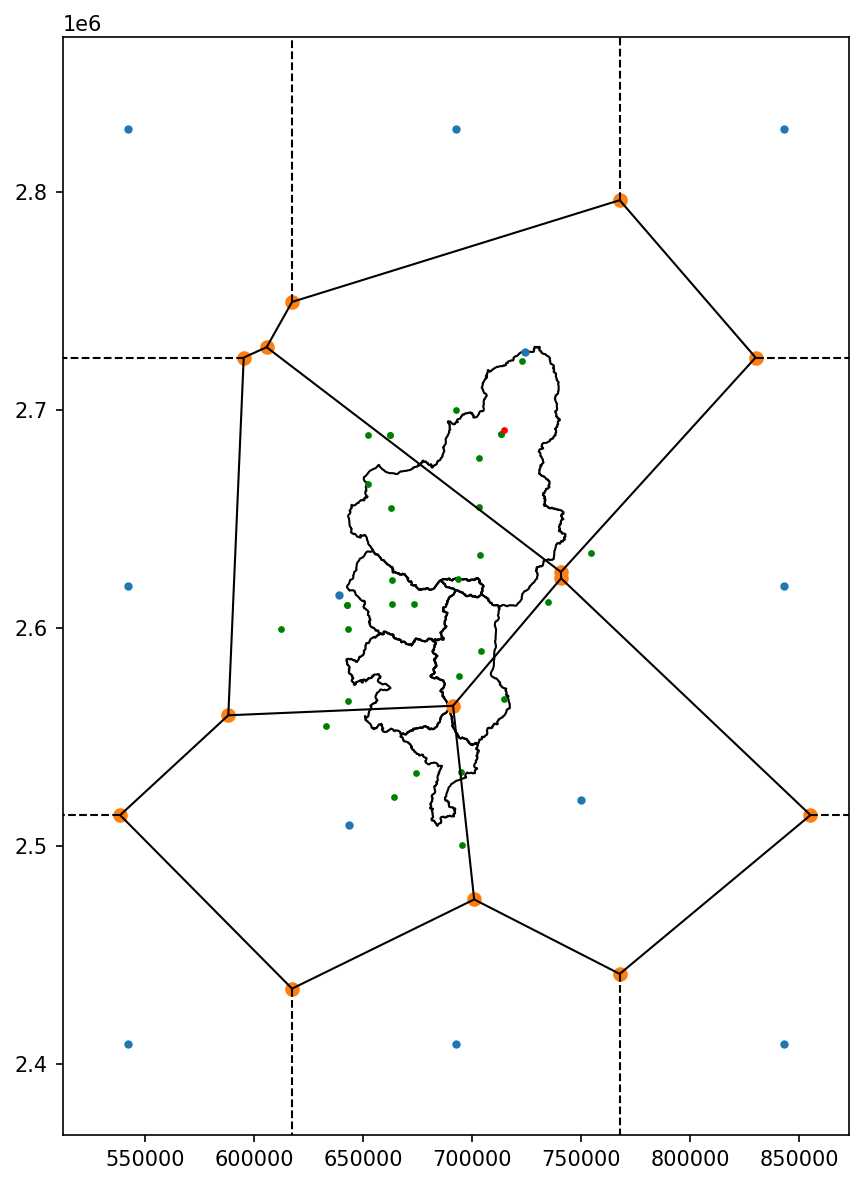

In [16]:
# Polígonos de Thiessen

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Creamos los polígonos de Thiessen.
#Thiessen = spatial.Voronoi( Estaciones[ ["x", "y"] ] )

# Graficamos las subcuencas.
gdf_subc.plot(ax = ax, color = "None", edgecolor = "k", zorder = 0)
# Graficamos la estación hidrométrica.
gdf_hidro.plot(ax = ax, color = "r", markersize = 5, zorder = 3)
# Graficamos las estaciones pluviométricas.
df_clic.plot(ax = ax, color = "g", markersize = 5, zorder = 2)
# Graficamos los polígonos de Thiessen.
spatial.voronoi_plot_2d(Thiessen, ax = ax, zorder = 1)

fig.tight_layout()
plt.show()